# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

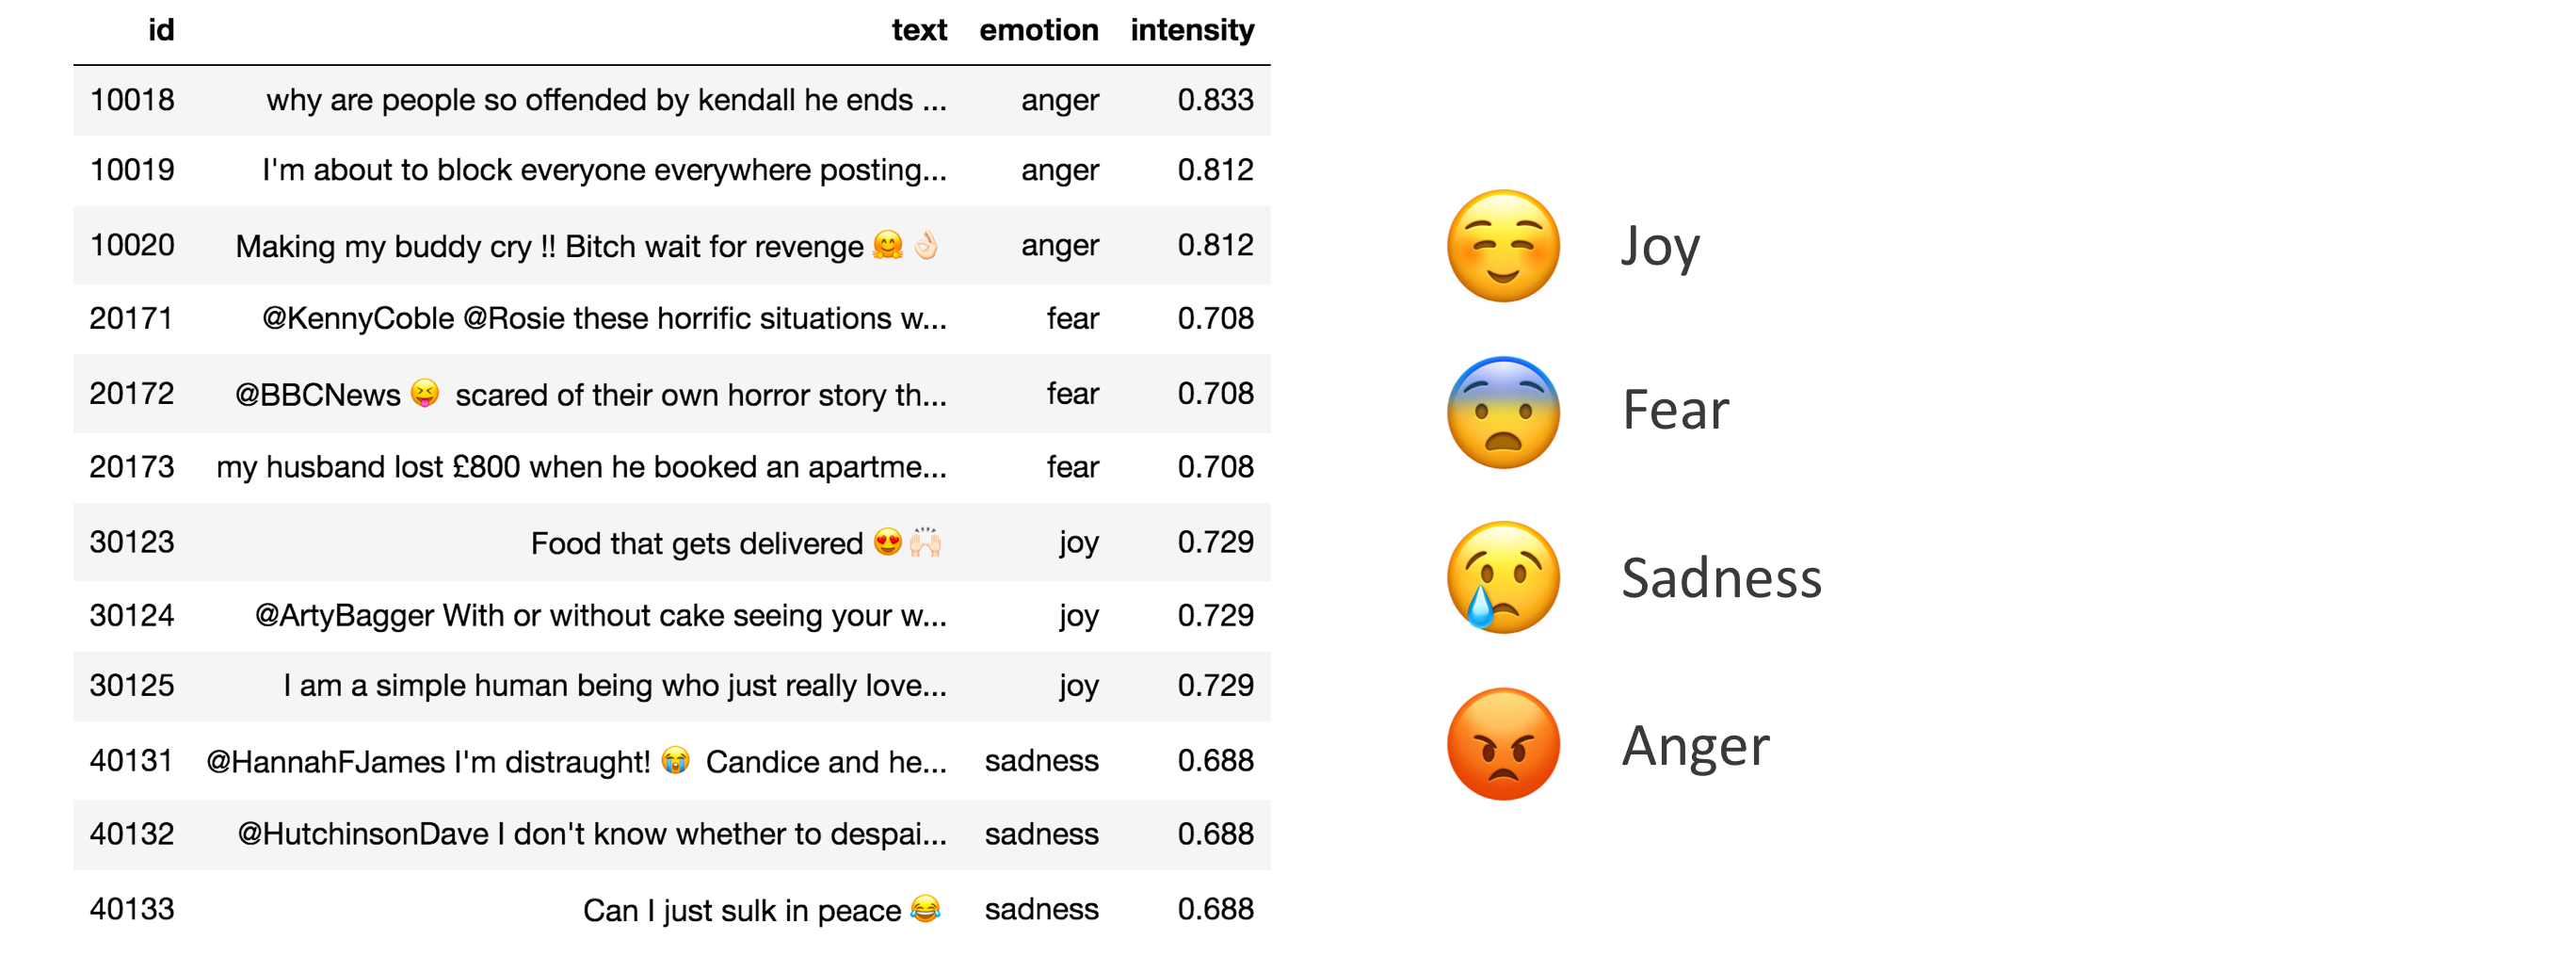

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
# Download English stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/aping/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aping/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
def get_top_words(df, n=30):
    # Combine all text into one large string
    all_text = ' '.join(df['text'])
    # Tokenize the string into words
    words = word_tokenize(all_text)
    # Filter out stopwords and non-alphabetic tokens
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    # Count word frequency
    word_counts = Counter(words)
    # Get the top n most common words
    top_words = word_counts.most_common(n)
    return top_words

# Get the top 30 words from train and test datasets
top_words_train = get_top_words(train_df)
top_words_test = get_top_words(test_df)

# Unzip word frequencies into separate lists for plotting
train_words, train_counts = zip(*top_words_train)
test_words, test_counts = zip(*top_words_test)

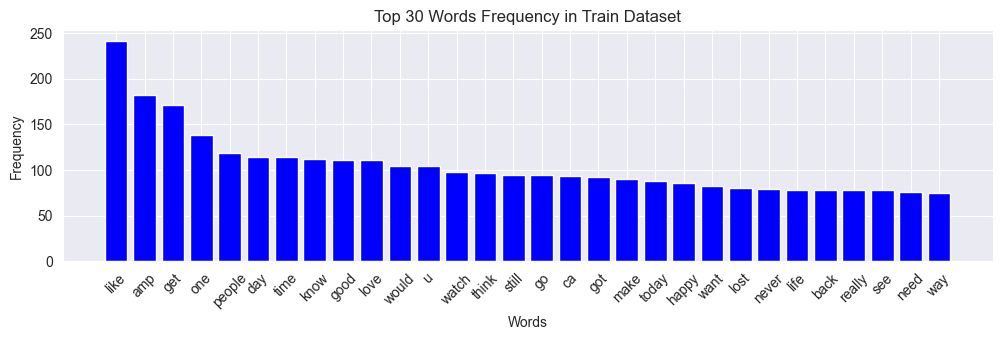

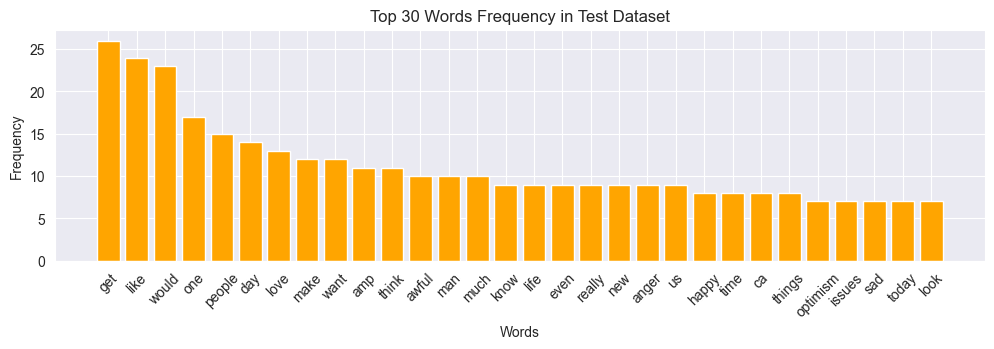

In [9]:
# Plot top 30 word frequencies for the training dataset
plt.figure(figsize=(12, 3))
plt.bar(train_words, train_counts, color='blue')
plt.xticks(rotation=45)
plt.title("Top 30 Words Frequency in Train Dataset")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# Plot top 30 word frequencies for the testing dataset
plt.figure(figsize=(12, 3))
plt.bar(test_words, test_counts, color='orange')
plt.xticks(rotation=45)
plt.title("Top 30 Words Frequency in Test Dataset")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [10]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [11]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [12]:
train_df

,id,text,emotion,intensity
691,10691,srry my feelings offend u 🤗,anger,0.354
1047,20190,induction day tomorrow for pizza express #nervous,fear,0.688
2096,30092,@yoshi_lucky Good morning.Let's start with a s...,joy,0.769
2945,40118,@wabermes The @RavalliRepublic had a good one ...,sadness,0.708
347,10347,@Alanafergusson snap meee,anger,0.521
...,...,...,...,...
1181,20324,Fosu Mensah is having a complete nightmare! It...,fear,0.604
56,10056,Absolutely fuming that some woman jumped into ...,anger,0.750
2675,30671,@mark_slifer actually maybe we were supposed t...,joy,0.292
837,10837,Follow me on Snapchat 👻 Carlabtst15 #snapchat ...,anger,0.167


For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [13]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

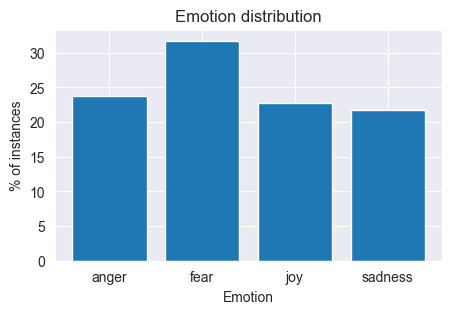

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [17]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [18]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [19]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [20]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [22]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [23]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [24]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/aping/PycharmProjects/DM2024-Lab2/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [25]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [26]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [27]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [28]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer with 1000 features
TFIDF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Learn vocabulary and transform the training data into TF-IDF matrix
TFIDF_vectorizer.fit(train_df['text'])

# Transform both training and test datasets
train_data_TFIDF_features = TFIDF_vectorizer.transform(train_df['text'])
test_data_TFIDF_features = TFIDF_vectorizer.transform(test_df['text'])

In [29]:
# Check the dimension of the transformed data
train_data_TFIDF_features.shape

(3613, 1000)

In [30]:
# Get feature names and print features from index 100 to 110
feature_names_1000 = TFIDF_vectorizer.get_feature_names_out()
feature_names_1000[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [32]:
# NOTE The decision tree will automatically select the words or features that are most distinctive for each emotion label as the nodes.

In [33]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'anger', 'sadness', 'joy', 'fear', 'joy', 'sadness',
       'fear', 'anger'], dtype=object)

## 4. Results Evaluation

Now we will check the results of our model's performance

In [34]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [35]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [36]:
# NOTE Here I've changed the original matrix format to a clearer tabular representation of the numbers.

In [37]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

# Define class labels
labels = ['anger', 'fear', 'joy', 'sadness']

# Convert confusion matrix to a DataFrame with customized row and column names
cm_df = pd.DataFrame(cm, index=[f'Actual {labels[0]}'] + labels[1:], columns=[f'Predicted {labels[0]}'] + labels[1:])

# Display the formatted confusion matrix
print(cm_df)

              Predicted anger  fear  joy  sadness
Actual anger               57    18    6        3
fear                       16    76    9        9
joy                         6     9   56        8
sadness                     7    13    7       47


In [38]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(3,3))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

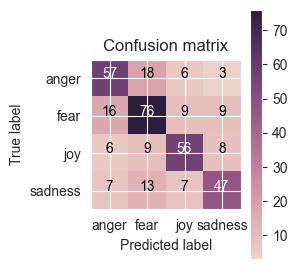

In [39]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [40]:
# Answer here
'''
Each row represents the actual emotion label, while each column represents the predicted emotion label.

1. Diagonal Elements: These represent correct predictions for each emotion, showing that the model generally has good performance, with most predictions falling along the diagonal.
2. Off-diagonal Elements: These are the misclassified samples, indicating which emotions are commonly confused. For example, "anger" is often misclassified as "fear," and "fear" is sometimes mistaken for "anger."

As example for 'anger':
Actual anger: Out of all samples labeled as "anger":
 - 57 were correctly predicted as "anger" (True Positives for "anger").
 - 18 were incorrectly predicted as "fear."
 - 6 were incorrectly predicted as "joy."
 - 3 were incorrectly predicted as "sadness."
'''

'\nEach row represents the actual emotion label, while each column represents the predicted emotion label.\n\n1. Diagonal Elements: These represent correct predictions for each emotion, showing that the model generally has good performance, with most predictions falling along the diagonal.\n2. Off-diagonal Elements: These are the misclassified samples, indicating which emotions are commonly confused. For example, "anger" is often misclassified as "fear," and "fear" is sometimes mistaken for "anger."\n\nAs example for \'anger\':\nActual anger: Out of all samples labeled as "anger":\n - 57 were correctly predicted as "anger" (True Positives for "anger").\n - 18 were incorrectly predicted as "fear."\n - 6 were incorrectly predicted as "joy."\n - 3 were incorrectly predicted as "sadness."\n'

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [41]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_test_pred_nb = nb_model.predict(X_test)

In [42]:
# Calculate accuracy
acc_test_nb = accuracy_score(y_test, y_test_pred_nb)
print('Testing accuracy (Naive Bayes):', round(acc_test_nb, 2))

# Print classification report for precision, recall, and F1-score
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_test_pred_nb))

Testing accuracy (Naive Bayes): 0.7

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [43]:
# Generate and display confusion matrix
cm_nb = confusion_matrix(y_test, y_test_pred_nb)
labels = ['anger', 'fear', 'joy', 'sadness']
cm_df_nb = pd.DataFrame(cm_nb, index=[f'Actual {labels[0]}'] + labels[1:], columns=[f'Predicted {labels[0]}'] + labels[1:])

print("\nConfusion Matrix (Naive Bayes):")
print(cm_df_nb)


Confusion Matrix (Naive Bayes):
              Predicted anger  fear  joy  sadness
Actual anger               55    15    5        9
fear                        9    85    5       11
joy                        11     6   56        6
sadness                    12    10    6       46


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [44]:
# Answer here
'''
[COMPARE result of Naive Bayes and Decision Trees]
1. Accuracy: 
    Naive Bayes achieves higher accuracy than Decision Trees on text data because of its suitability for high-dimensional, sparse datasets and its independence assumption that works well with BoW.
2. Precision, Recall, and F1-Score:
    (1) Naive Bayes: This model usually achieves high precision and recall across all classes if the dataset features are independent. Naive Bayes tends to classify text accurately but may struggle with complex, interdependent features, leading to occasional misclassifications for similar classes
    (2) Decision Tree: Due to the lack of independence assumptions and its tendency to split data exhaustively, Decision Trees can fit well to training data but may generalize poorly, especially on unseen test data. The model may exhibit high variance, performing well on training data but worse on testing data (overfitting), leading to lower F1-scores across categories.
3. Confusion Matrix:
    In a confusion matrix, the Naive Bayes models misclassifying similar classes less frequently than Decision Trees, particularly for closely related emotions.
    
[Theoretical background]
1. Naive Bayes:
    it relies on conditional independence between features, assuming that each feature (word) independently contributes to the probability of each class (emotion). This makes it highly efficient for text data, where high-dimensional but sparse feature spaces are common. Due to its reliance on probabilities rather than exhaustive splitting, it tends to generalize well to new, unseen data, leading to more consistent performance across different classes.
2. Decision Trees:
    operate by recursive partitioning of the feature space and try to maximize information gain at each split. For text data with many features and sparse patterns, decision trees can easily overfit, creating deep branches that respond to specific training data quirks but fail to generalize to testing data. This lack of generalization typically reduces Decision Tree performance in comparison to Naive Bayes on high-dimensional text data.
    
[Difference]
1. Naive Bayes:
    it perform better on testing accuracy and F1-score than decision tree because its simplicity and probabilistic nature are better suited for handling high-dimensional, sparse, and independent features
2. Decision Trees:
    it may show more variability in performance due to their tendency to overfit on complex feature spaces, resulting in lower accuracy and more class misclassifications in the confusion matrix.
'''

'\n[COMPARE result of Naive Bayes and Decision Trees]\n1. Accuracy: \n    Naive Bayes achieves higher accuracy than Decision Trees on text data because of its suitability for high-dimensional, sparse datasets and its independence assumption that works well with BoW.\n2. Precision, Recall, and F1-Score:\n    (1) Naive Bayes: This model usually achieves high precision and recall across all classes if the dataset features are independent. Naive Bayes tends to classify text accurately but may struggle with complex, interdependent features, leading to occasional misclassifications for similar classes\n    (2) Decision Tree: Due to the lack of independence assumptions and its tendency to split data exhaustively, Decision Trees can fit well to training data but may generalize poorly, especially on unseen test data. The model may exhibit high variance, performing well on training data but worse on testing data (overfitting), leading to lower F1-scores across categories.\n3. Confusion Matrix:\n

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)

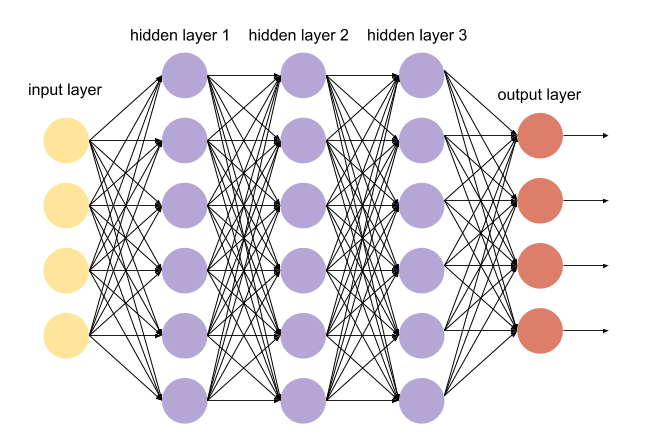

### 6.1 Prepare data (X, y)

In [45]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [46]:
import keras

In [47]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [48]:
# NOTE: y_train[0:4]: Shows that the first few labels in y_train are strings like "sadness," "fear," and "anger." After conversion, each label is now a one-hot encoded vector. For example: [0. 0. 0. 1.] represents "sadness."

In [49]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 691       anger
1047       fear
2096        joy
2945    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [50]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [52]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/Users/aping/PycharmProjects/DM2024-Lab2/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3426 - loss: 1.3586 - val_accuracy: 0.4323 - val_loss: 1.2996
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6047 - loss: 1.0929 - val_accuracy: 0.6744 - val_loss: 0.9292
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.8077 - loss: 0.6029 - val_accuracy: 0.7118 - val_loss: 0.7642
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8365 - loss: 0.4222 - val_accuracy: 0.7032 - val_loss: 0.8193
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.8918 - loss: 0.3270 - val_accuracy: 0.7003 - val_loss: 0.8230
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9215 - loss: 0.2483 - val_accuracy: 0.6888 - val_loss: 0.8794
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.9304 - loss: 0.2199 - val_accuracy: 0.6916 - val_loss: 0.9176
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.9408 - loss: 0.1843 - val_accuracy: 0

### 6.5 Predict on testing data

In [53]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[2.4863350e-04, 9.8598224e-01, 9.2247687e-04, 1.2846632e-02],
       [5.9999374e-04, 1.1196089e-03, 9.9804986e-01, 2.3061071e-04],
       [9.9999809e-01, 1.9924760e-09, 3.0919090e-10, 1.9107140e-06],
       [2.2604898e-02, 6.3757105e-03, 1.5874795e-05, 9.7100353e-01],
       [1.8892350e-10, 6.8438211e-10, 1.0000000e+00, 2.4739858e-11]],
      dtype=float32)

In [54]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'joy', 'anger', 'sadness', 'joy'], dtype=object)

In [55]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [56]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.372267,1.333073,0.432277,1.299593
1,1,0.638251,1.002315,0.674352,0.929172
2,2,0.787711,0.594377,0.711816,0.764228
3,3,0.837808,0.421529,0.703170,0.819265
4,4,0.882369,0.336785,0.700288,0.822995
5,5,0.902020,0.274951,0.688761,0.879360
6,6,0.924716,0.227398,0.691643,0.917590
7,7,0.936895,0.194886,0.665706,1.009949
8,8,0.946859,0.166856,0.688761,1.070441
9,9,0.954608,0.145570,0.691643,1.136056


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
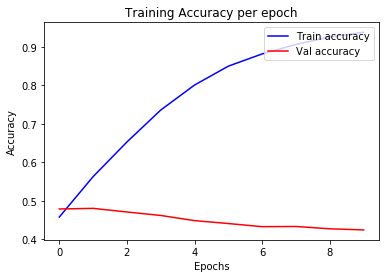

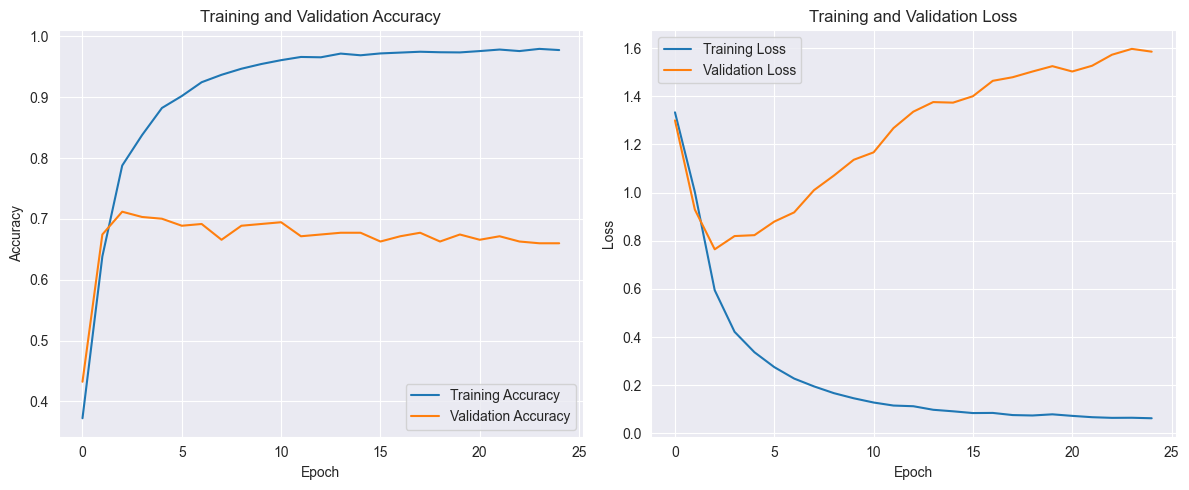

In [57]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt

# Load training log
training_log = pd.read_csv("logs/training_log.csv")

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [123]:
'''
Training accuracy is very high while validation accuracy is relatively low, and validation loss increases after an initial decrease. This indicates that the model memorizes the training data but lacks the ability to generalize to new data.
'''

'\nTraining accuracy is very high while validation accuracy is relatively low, and validation loss increases after an initial decrease. This indicates that the model memorizes the training data but lacks the ability to generalize to new data.\n'

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [58]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
691,10691,srry my feelings offend u 🤗,"[srry, my, feelings, offend, u, 🤗]"
1047,20190,induction day tomorrow for pizza express #nervous,"[induction, day, tomorrow, for, pizza, express, #, nervous]"
2096,30092,@yoshi_lucky Good morning.Let's start with a smile!\nLet's enjoy life in a cheerful way!\nDon't worry be happy!,"[@, yoshi_lucky, Good, morning.Let, 's, start, with, a, smile, !, \nLet, 's, enjoy, life, in, a, cheerful, way, !, \nDo, n't, worry, be, happy, !]"
2945,40118,@wabermes The @RavalliRepublic had a good one but then the reporter quit. #sad,"[@, wabermes, The, @, RavalliRepublic, had, a, good, one, but, then, the, reporter, quit, ., #, sad]"
347,10347,@Alanafergusson snap meee,"[@, Alanafergusson, snap, meee]"


In [59]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['srry', 'my', 'feelings', 'offend', 'u', '🤗']),
       list(['induction', 'day', 'tomorrow', 'for', 'pizza', 'express', '#', 'nervous']),
       list(['@', 'yoshi_lucky', 'Good', 'morning.Let', "'s", 'start', 'with', 'a', 'smile', '!', '\\nLet', "'s", 'enjoy', 'life', 'in', 'a', 'cheerful', 'way', '!', '\\nDo', "n't", 'worry', 'be', 'happy', '!'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [60]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

### 7.3 Generating word vector (embeddings)

In [61]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.30113718,  0.3560682 , -0.13406532,  0.33607554, -0.1435627 ,
       -0.80616885,  0.5532646 ,  1.353517  , -0.09434356, -0.44633716,
       -0.541213  , -0.36647812,  0.07765614,  0.16466773, -0.3538145 ,
       -0.05708898,  0.43503487, -0.48019668,  0.43791613, -0.9115874 ,
        0.63313246,  0.86653036,  0.42768   , -0.14388172,  0.18723345,
       -0.30536735, -0.32680494,  0.40096158, -0.58056885,  0.278162  ,
        0.07812119, -0.06653911,  0.6439373 , -0.61041534, -0.25687394,
        0.6761201 ,  0.32541066,  0.05215022, -0.78754807,  0.12612617,
        0.23038505, -0.03082367, -0.6824951 ,  0.10600092,  0.7754581 ,
       -0.5593858 , -0.6225077 ,  0.07454978,  0.4312483 ,  0.17386562,
        0.07674494, -0.4812313 , -0.29319978,  0.07159881, -0.47746277,
       -0.2784862 ,  0.00232306, -0.56243867,  0.09280914,  0.37690663,
        0.21722534, -0.23541741,  0.76538974,  0.1246024 , -0.9167301 ,
        0.67385495, -0.09446255,  0.79847336, -1.5007789 ,  0.57

In [62]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9329870343208313),
 ('help', 0.932543933391571),
 ('Be', 0.9288225173950195),
 ('Makes', 0.9170812368392944),
 ('cats', 0.9158297181129456),
 ('birthday', 0.9131050705909729),
 ('whitephosphrus', 0.9117730855941772),
 ('Really', 0.9051357507705688),
 ("'be", 0.9026777744293213),
 ('cry', 0.9014405608177185)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [63]:
from gensim.models import KeyedVectors

# HINT: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [64]:
# NOTE: A higher similarity score means a word that is more similar to "happy"
w2v_google_model.most_similar('happy', topn=10)

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [65]:
import gensim.downloader as api
## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### 7.5 king + woman - man = ?    
Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [66]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [67]:
# Answer here
'''
To utilize word vectors for representing sentence data, we need to convert a sequence of words (i.e., a sentence) into either a single vector or a set of vectors that can be used as input for a machine learning model.
We can achieve this using various methods, such as Averaging Word Embeddings (Sentence Embedding), TF-IDF Weighted Word Embeddings, Concatenation or Pooling, Transformer Models (like BERT), and more.
'''

'\nTo utilize word vectors for representing sentence data, we need to convert a sequence of words (i.e., a sentence) into either a single vector or a set of vectors that can be used as input for a machine learning model.\nWe can achieve this using various methods, such as Averaging Word Embeddings (Sentence Embedding), TF-IDF Weighted Word Embeddings, Concatenation or Pooling, Transformer Models (like BERT), and more.\n'

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [68]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [69]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


In [70]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [71]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [72]:
word_list = ['happy', 'angry', 'data', 'mining']

# NOTE: This code snippet is creating four lists of words related to specific target words ('happy', 'angry', 'data', and 'mining') using a pre-trained Word2Vec model (w2v_google_model).
topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

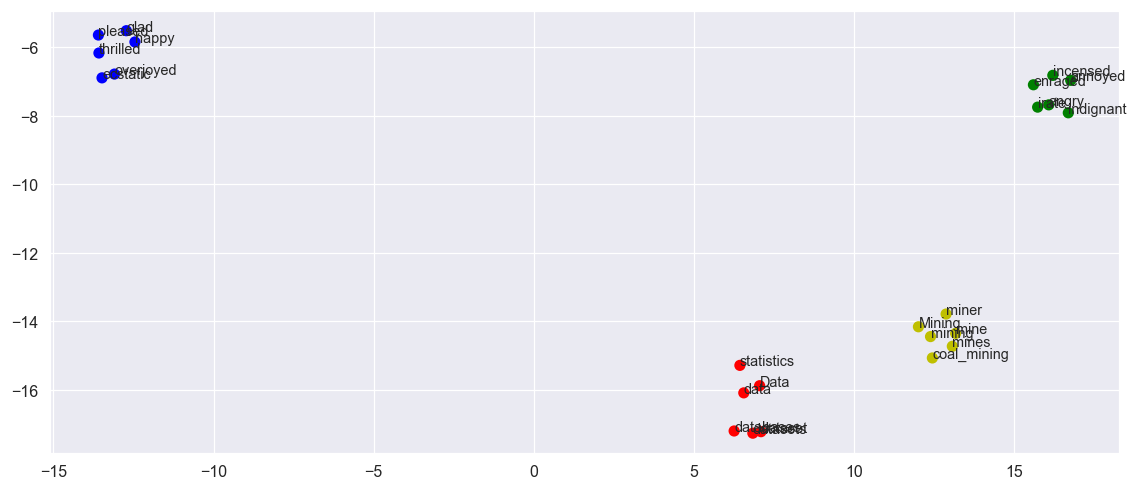

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(12, 5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points', fontsize=9)
plt.show()

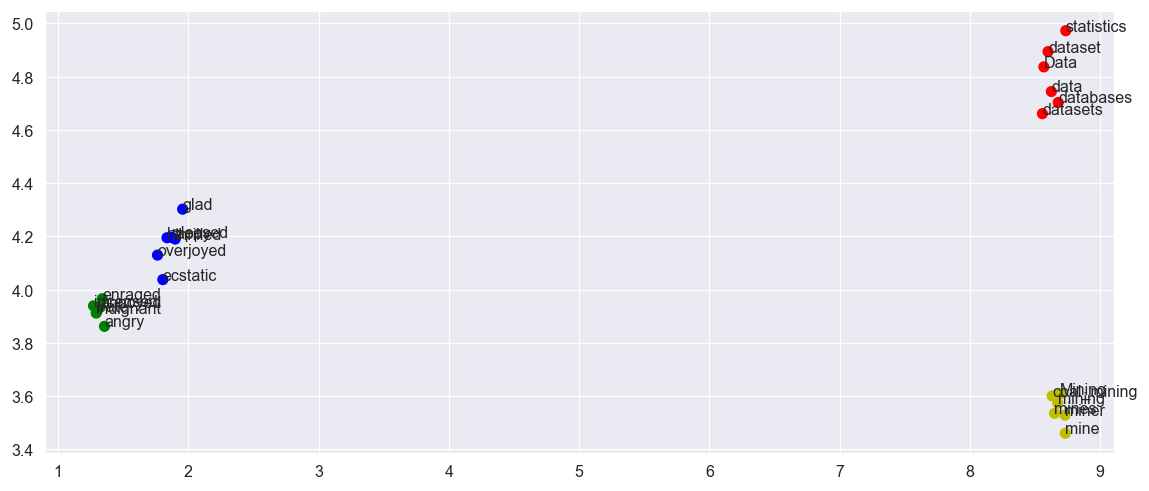

In [74]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(12, 5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [75]:
# Answer here
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Assuming we have a pre-trained Word2Vec model
model = w2v_google_model

# Define target words
target_words = ["angry", "happy", "sad", "fear"]

# Get the 15 most related words for each target word
topn = 15
related_words = []

for word_ in target_words:
    similar_words = [word] + [word_ for word_, _ in model.most_similar(word, topn=topn)]
    related_words.extend(similar_words)

# Remove duplicates
related_words = list(set(related_words))

# Extract word vectors for the related words
X_train = model[related_words]

In [76]:
# TODO: 1. t-SNE Dimensionality Reduction
tsne = TSNE(n_components=2, metric='cosine', random_state=28, perplexity=10)
X_tsne = tsne.fit_transform(X_train)

# TODO: 2. UMAP Dimensionality Reduction
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)# TODO: 1. t-SNE Dimensionality Reduction
tsne = TSNE(n_components=2, metric='cosine', random_state=28, perplexity=5)
X_tsne = tsne.fit_transform(X_train)

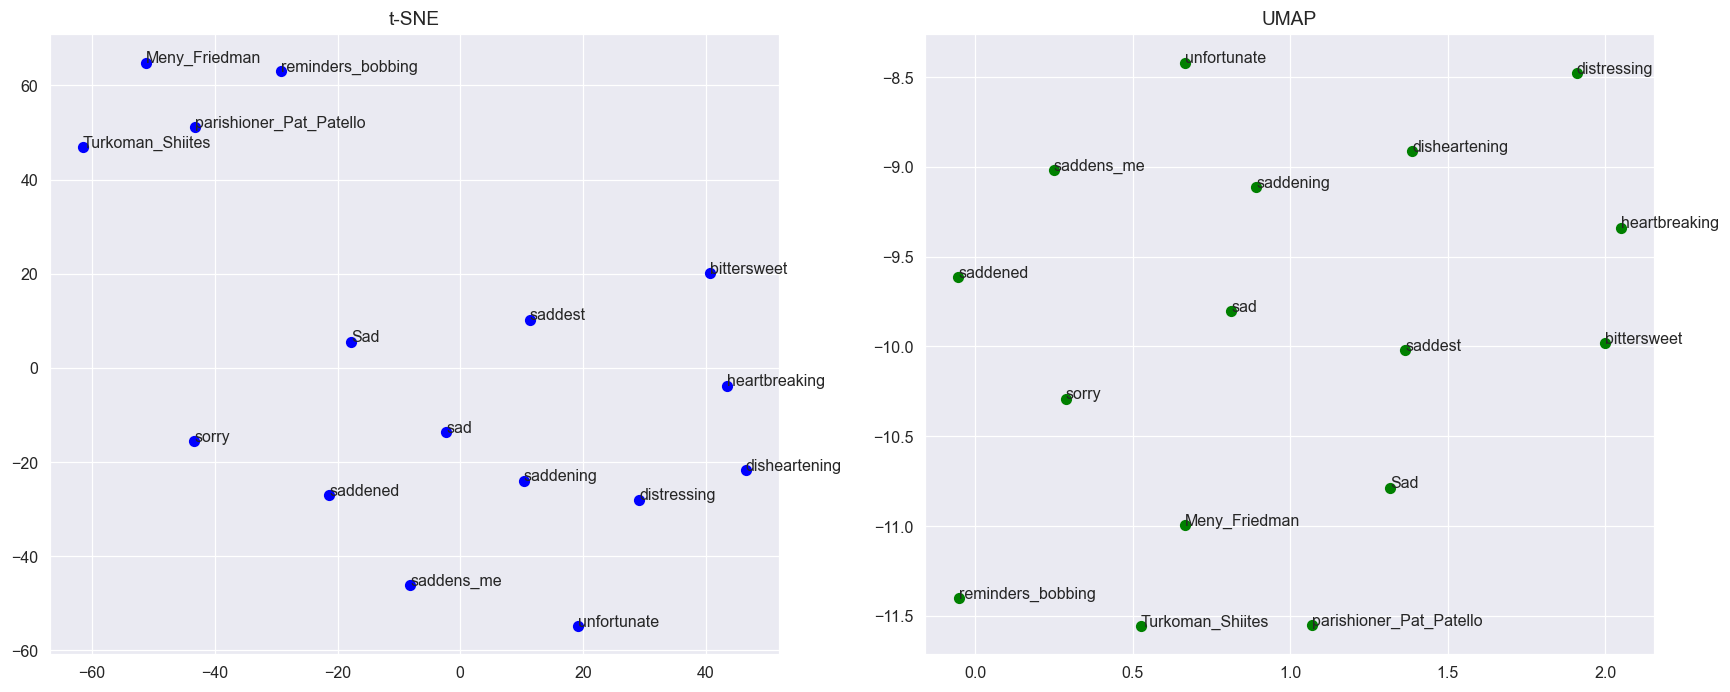

In [77]:
# Plotting t-SNE and UMAP side by side after the reduction is done
fig, axes = plt.subplots(1, 2, figsize=(18, 7), dpi=115)

# Plot t-SNE
axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue')
for label, x, y in zip(related_words, X_tsne[:, 0], X_tsne[:, 1]):
    axes[0].annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=10)
axes[0].set_title('t-SNE')

# Plot UMAP
axes[1].scatter(X_umap[:, 0], X_umap[:, 1], c='green')
for label, x, y in zip(related_words, X_umap[:, 0], X_umap[:, 1]):
    axes[1].annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=10)
axes[1].set_title('UMAP')

plt.show()

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.
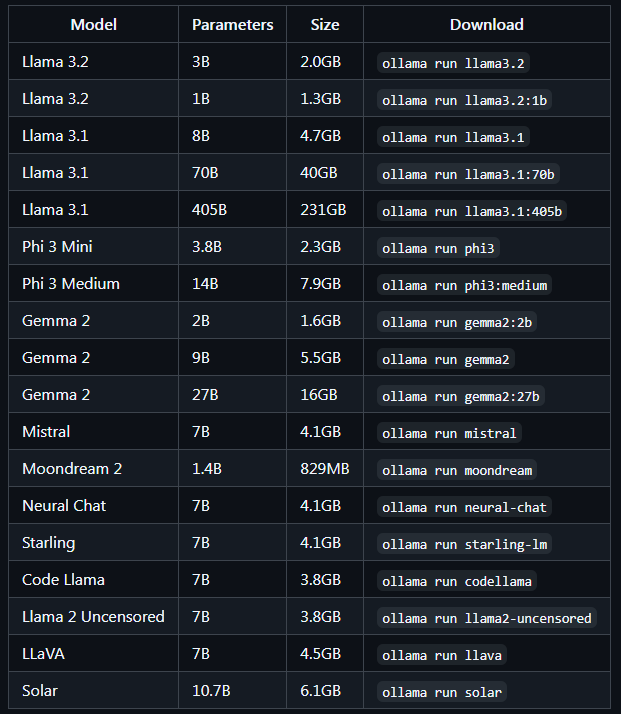

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [78]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

# Data Mining

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to analyze and extract valuable information from data.

## Key Characteristics

*   **Automated discovery**: Data mining uses algorithms and techniques to automatically identify patterns and relationships in data.
*   **Large datasets**: Data mining typically involves working with very large datasets, often in the order of millions or billions of records.
*   **Insight generation**: The ultimate goal of data mining is to generate insights that can inform business decisions, improve operations, or solve complex problems.

## Types of Data Mining

### 1. **Supervised Learning**

In supervised learning, the algorithm is trained on labeled data (e.g., where each record has a target variable) and learns to predict the target variable for new, unseen data.

*   Example: Predicting customer churn based

**We can use the IPython library to make the response look better:**

In [79]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [80]:
display(Markdown(response['message']['content']))

# Data Mining
=====================================

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to analyze and extract valuable information from data.

## Key Characteristics

*   **Automated discovery**: Data mining uses algorithms and techniques to automatically identify patterns and relationships in data.
*   **Large datasets**: Data mining typically involves working with very large datasets, often in the order of millions or billions of records.
*   **Insight generation**: The ultimate goal of data mining is to generate insights that can inform business decisions, improve operations, or solve complex problems.

## Types of Data Mining

### 1. **Supervised Learning**

In supervised learning, the algorithm is trained on labeled data (e.g., where each record has a target variable) and learns to predict the target variable for new, unseen data.

*   Example: Predicting customer churn based on demographic information.
*   Algorithm: Decision Trees, Random Forests, Support Vector Machines (SVMs).

### 2. **Unsupervised Learning**

In unsupervised learning, there is no labeled data, and the algorithm must find patterns or structure in the data on its own.

*   Example: Identifying clusters of customers with similar buying behavior.
*   Algorithm: K-Means Clustering, Hierarchical Clustering.

### 3. **Semi-Supervised Learning**

In semi-supervised learning, a combination of labeled and unlabeled data is used to train the algorithm.

*   Example: Predicting customer churn based on both demographic information and behavior data.
*   Algorithm: Random Forests with a small portion of labeled data.

## Data Mining Techniques

### 1. **Pattern Recognition**

This involves identifying patterns or relationships in the data that may not be immediately apparent.

*   Example: Identifying correlations between variables such as age, income, and spending habits.

### 2. **Clustering**

This involves grouping similar records together based on their characteristics.

*   Example: Segmenting customers into clusters based on demographics, behavior, and purchase history.

### 3. **Predictive Modeling**

This involves using statistical models to predict outcomes or behaviors in new data.

*   Example: Predicting the likelihood of a customer churning based on demographic information and past behavior.

## Benefits of Data Mining

*   **Improved decision-making**: Data mining can provide insights that inform business decisions, leading to improved operations and revenue growth.
*   **Increased efficiency**: Automated discovery processes can reduce manual analysis time and improve accuracy.
*   **Competitive advantage**: Companies that effectively use data mining can gain a competitive advantage over their peers.

## Challenges of Data Mining

*   **Data quality issues**: Poorly collected, incomplete, or inconsistent data can lead to inaccurate results.
*   **Complexity**: Large datasets and complex algorithms can be difficult to manage and interpret.
*   **Scalability**: Data mining can be computationally intensive, requiring significant computational resources.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.  

In [81]:
# Answer here
import ollama

response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are a helpful assistant knowledgeable about technology and science.'
    },
    {
        'role': 'assistant',
        'content': 'Blockchain is a decentralized digital ledger that records transactions across multiple computers, ensuring that the information is secure, transparent, and unalterable.'
    }
])

print(response['message']['content'])


 The core concept of blockchain technology was first introduced by an individual or group of individuals using the pseudonym Satoshi Nakamoto in 2008.

Here's how it works:

**Key Components:**

1. **Blocks:** A group of transactions is combined into a single block.
2. **Chain:** Each block is linked to the previous one through a unique code called a "hash."
3. **Network:** A network of computers (nodes) verifies and records transactions.

**How it Works:**

1. Transactions occur between users on the blockchain network.
2. The transaction data is verified by nodes using complex algorithms and cryptography.
3. Once verified, the transaction data is combined with other transactions into a block.
4. Each block is linked to the previous one through its unique hash, creating a chain of blocks (hence the name blockchain).
5. The entire network verifies and validates the new block.

**Advantages:**

1. **Security:** Blockchain technology uses cryptography to secure data and ensure that it's t

### 10.2 Multi-Modal Prompting - Text + Images  
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues    

We will use the **llava-phi3** model that we installed to request a description of the images:

In [82]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

The image captures a delightful moment of a Shiba Inu dog in mid-air, frozen in time. The dog's fur is a mix of cream and tan, with white markings adorning its face and legs. It has a distinctive black nose and pink tongue that are visible as it jumps through the air.

The Shiba Inu is positioned on all fours in the foreground, but one leg is lifted off the ground while its mouth is wide open with its tongue out, adding to the sense of motion captured in the image. The background features a grassy lawn that extends into what appears to be a park setting.

The focus of the image is on the Shiba Inu and its action, making other elements like trees blurred and indistinct. This gives an impression of depth and distance, further emphasizing the dog as the main subject of this photograph. The overall composition suggests a playful moment captured outdoors, perhaps during a game or training session with its owner.

In [83]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))


This image features a tabby cat with a long tail, standing on its hind legs. The cat's body and tail are covered in gray stripes, while its paws are a lighter shade of gray. The cat is positioned facing the camera directly, giving us a full view of its striking gaze. Its ears are perked up, indicating alertness or curiosity. The background of the image is white, which contrasts with the cat's striped pattern and helps it stand out in the center of the frame. There are no other objects in the image, making the cat the sole focus of this photo. The relative position of the cat to the background suggests it's standing on a flat surface. There's no text or any other discernible action taking place in the image.

### ** >>> Exercise 10 (Take home): **   

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [84]:
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/pictest.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image portrays a young girl with blonde hair, dressed in the uniform of an all-girl school. Her attire consists of a blue and white striped sailor collar on her white shirt. She stands against a vibrant backdrop adorned with pink and blue stars. The word "E KATSUU" is prominently displayed in the top left corner, adding a touch of mystery to the scene. Her expression is neutral, yet there's a hint of surprise that flickers in her eyes as she looks directly into the camera.

In [85]:
'''
Basically the picture description is correct, the main elements have been described, this picture is the character：トガヒミコ（渡我被身子 <僕のヒーローアカデミア>）, but has not been mentioned, may be because he does not yet have a database of this character.
'''

'\nBasically the picture description is correct, the main elements have been described, this picture is the character：トガヒミコ（渡我被身子 <僕のヒーローアカデミア>）, but has not been mentioned, may be because he does not yet have a database of this character.\n'

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [86]:
import ollama
import bs4
import os
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_ollama import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

os.environ["USER_AGENT"] = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.3 Safari/605.1.15"
url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

USER_AGENT environment variable not set, consider setting it to identify your requests.


Based on the information provided, IBM's related solutions with LLMs (Large Language Models) include:

1. Watsonx.ai: A platform that features IBM's Granite model series, which serves as the generative AI backbone for other IBM products such as watsonx Assistant and watsonx Orchestrate.
2. Watsonx Assistant: A product that leverages IBM's LLMs to provide conversational interfaces for organizations.
3. Watsonx Orchestrate: A product that utilizes IBM's LLMs to enable content generation, summarization, and translation tasks.

These solutions demonstrate IBM's commitment to integrating Large Language Models into its products and services, enabling them to provide enhanced natural language understanding (NLU) and processing (NLP) capabilities to organizations.

### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [88]:
# Answer here
import os
import ollama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_ollama import OllamaEmbeddings

# Set User-Agent for web requests
os.environ["USER_AGENT"] = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.3 Safari/605.1.15"

llm_model = "llama3.2"  # Change to your preferred model

# Function to load, split, and retrieve documents from multiple URLs
def load_and_retrieve_docs(urls):
    docs = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        loaded_docs = loader.load()  # Load the URL content
        docs.extend(loaded_docs)  # Add to our documents list
    
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(docs)
    
    # Generate embeddings with the Ollama model
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)  # Vector storage
    return vectorstore.as_retriever()

# URLs to load content from
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://en.wikipedia.org/wiki/Machine_learning",
    "https://www.ibm.com/cloud/learn/neural-networks"
]

# Create the retriever with three documents
retriever = load_and_retrieve_docs(urls)

# Format documents to be used for prompting
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Three example questions (one for each URL/document)
questions = [
    "What are the related solutions of IBM with large language models?",
    "What is the difference between supervised and unsupervised learning?",
    "How do neural networks work in general, according to IBM?"
]

# Use the RAG chain for each question
for question in questions:
    result = rag_chain(question)
    print(f"Question: {question}\nAnswer: {result}\n{'-'*80}")

Question: What are the related solutions of IBM with large language models?
Answer: Based on the provided information, IBM's related solutions with large language models (LLMs) include:

1. Watsonx AI: This is a platform that hosts IBM's Granite model series, which serves as a generative AI backbone for other IBM products.
2. Watsonx Assistant: This product uses the Granite model series to provide conversational capabilities and AI-powered assistance.
3. Watsonx Orchestrate: This product also leverages the Granite model series to offer AI-driven orchestration and automation capabilities.

These solutions are designed to leverage the power of LLMs to provide AI-driven capabilities for various applications, such as natural language processing, conversation management, and automation.
--------------------------------------------------------------------------------
Question: What is the difference between supervised and unsupervised learning?
Answer: The main difference between supervised 

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [89]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [90]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [91]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [92]:
df_train #We can see the new column with the embeddings 

,id,text,emotion,intensity,text_tokenized,embeddings
691,10691,srry my feelings offend u 🤗,anger,0.354,"[srry, my, feelings, offend, u, 🤗]","[-0.5188482999801636, 0.262967586517334, 1.9842710494995117, -1.2678122520446777, -0.8264675140380859, -2.103118419647217, 1.6583442687988281, -1.0979819297790527, 0.15750005841255188, -1.7721247673034668, 1.5842753648757935, 0.5086634159088135, 1.0788475275039673, 1.241428256034851, 2.1153452396392822, -0.2891162037849426, -0.26352259516716003, 0.20184451341629028, 1.8778202533721924, 0.8736745119094849, 0.9908771514892578, -1.2958725690841675, 0.5764005184173584, 0.36590418219566345, -2.4680376052856445, -0.2298729419708252, 0.9254134297370911, -0.6060948967933655, -0.7004071474075317, -1.1120514869689941, 0.7883980870246887, 0.44717299938201904, -0.35108935832977295, 1.756388545036316, 1.2760053873062134, -0.06918974220752716, -2.8598146438598633, 1.166670560836792, -0.22283855080604553, -1.0551161766052246, 0.09044961631298065, -0.05181803181767464, 1.8256404399871826, 1.4918991327285767, -0.8651949167251587, -1.9267150163650513, 0.4717804491519928, 0.9462363719940186, -0.3917609453201294, -0.1881938874721527, -0.8449744582176208, -1.3795161247253418, 0.19702331721782684, 0.6259157657623291, 0.11596563458442688, 0.7346285581588745, 2.717207431793213, -3.426464319229126, 0.17062924802303314, 0.9456081390380859, 1.5844378471374512, -1.2138919830322266, -1.5593388080596924, -1.3306021690368652, 0.3262111246585846, -2.08882999420166, -0.3841242790222168, -0.6918505430221558, -1.4967951774597168, 0.14470325410366058, -0.27317118644714355, 1.8980659246444702, 0.7191975116729736, -0.182022362947464, 0.13701023161411285, -2.3207335472106934, 0.2959786057472229, -0.5104284286499023, -0.4633413255214691, 1.9992930889129639, -2.617008924484253, 0.7306005954742432, 0.7088993787765503, 0.3729737102985382, -2.8163084983825684, -0.7000561356544495, -0.26482364535331726, 0.46139010787010193, 0.6929798722267151, -0.2769193947315216, -0.12197521328926086, 0.43022534251213074, -1.0516663789749146, -0.8975448608398438, -0.9879233241081238, 0.54465651512146, 0.5058479309082031, -0.11412636935710907, 0.8740249872207642, 3.2859084606170654, ...]"
1047,20190,induction day tomorrow for pizza express #nervous,fear,0.688,"[induction, day, tomorrow, for, pizza, express, #, nervous]","[-0.28028959035873413, -1.5750619173049927, 1.6160451173782349, 0.9289880990982056, 0.21857450902462006, -1.7750506401062012, -2.8201804161071777, 1.7657662630081177, 1.4028769731521606, -0.8043047189712524, 0.1975272297859192, -2.406913995742798, -0.12578962743282318, 0.2410176396369934, -2.396329164505005, -1.4535738229751587, 0.48781147599220276, -0.5175424814224243, 4.903995037078857, -2.790724039077759, 0.7065572142601013, 0.08509810268878937, 0.27472713589668274, 1.327761173248291, -1.0243169069290161, -1.3795270919799805, 1.2391548156738281, -1.9592318534851074, 0.7577453851699829, -0.058179862797260284, 0.692400336265564, -1.822360634803772, -1.9916889667510986, -0.824554443359375, 0.18854783475399017, -1.3269379138946533, -0.6270111799240112, -0.36684107780456543, 0.19667480885982513, -1.7131794691085815, 2.098309278488159, -0.12531758844852448, -0.10153841227293015, 0.5113774538040161, -0.2034408152103424, -1.6363191604614258, 2.3189332485198975, 0.9244399666786194, -2.487030267715454, -0.04532291740179062, -0.7674936056137085, -0.5848734378814697, -0.007144015282392502, -1.989836573600769, -0.5042427778244019, -1.0802334547042847, 1.5023727416992188, -0.8981527090072632, 0.14050401747226715, 0.7326209545135498, 2.3783788681030273, -1.260189175605774, -1.710692048072815, -0.273419588804245, 2.933358669281006, -4.967041492462158, 0.23336270451545715, 3.6307413578033447, -0.36359766125679016, -1.5408742427825928, -1.4684354066848755, 0.2103883922100067, 0.5625021457672119, -0.7133261561393738, -0.6190821528434753, -0.42850545048713684, -0.4360703229904175, -2.046438455581665, -0.427289754152298, 1.060744285583496, -0.5900345

In [93]:
df_test #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings
313,40826,"@LeePorter94 @DomMcGovern_ hi Dom I saw u at Notts county away, looking for 1 mufc away ticket will pay",sadness,0.312,"[0.15998578071594238, 0.9148697853088379, 2.311628580093384, 0.19865506887435913, 0.3637232184410095, -0.28599950671195984, -0.7921861410140991, 1.7437556982040405, 1.0929378271102905, -0.9587245583534241, 0.7876042723655701, 0.6779245138168335, 1.8017830848693848, 0.5404285788536072, -0.1899590939283371, -0.9258801341056824, 1.84596848487854, -0.6839560866355896, -0.3194752037525177, -0.18182045221328735, 1.4355244636535645, -0.6198620796203613, 2.0142743587493896, -1.5946155786514282, 7.447805881500244, -0.22574619948863983, 0.9066431522369385, -1.2365397214889526, -0.5808516144752502, 1.4407248497009277, 0.5360729098320007, 0.24147310853004456, -2.5077874660491943, -0.13001129031181335, 0.1063704639673233, 0.7209828495979309, -1.2015842199325562, -1.667852759361267, 0.7368906140327454, -0.1378050297498703, 0.6898074746131897, 0.862553596496582, -0.11331275850534439, 3.5327489376068115, -1.5551785230636597, 0.7709017992019653, 0.279561311006546, -2.12774658203125, -0.20381584763526917, -1.0330146551132202, 2.1237356662750244, 0.8606407046318054, -1.187082290649414, 0.5841506123542786, 0.49494799971580505, 0.08120053261518478, 0.13982796669006348, -0.8498566746711731, -0.16409426927566528, 0.03647817671298981, 1.0155718326568604, 2.0816292762756348, -0.4729973077774048, 0.11098088324069977, 4.606299877166748, -2.037529468536377, -0.5422995090484619, -1.9149885177612305, -0.6119526028633118, 0.06999479979276657, -3.714829206466675, 0.4275979995727539, -1.7484626770019531, -0.3746947944164276, -1.9988138675689697, 1.256347894668579, 1.505242943763733, -0.010364280082285404, 0.7080113887786865, -0.011181139387190342, -1.9002691507339478, -0.08859958499670029, 0.8207208514213562, 0.0186490248888731, -4.063146591186523, 1.0183013677597046, -0.8476772308349609, 0.4878707528114319, -0.8300088047981262, -0.021933382377028465, 0.47217413783073425, 0.38313424587249756, 0.09151376783847809, -0.8595266342163086, 1.4433815479278564, 0.9558781981468201, -0.28744441270828247, -1.0141265392303467, 3.0636837482452393, 1.2989380359649658, ...]"
211,30840,4-2 Canada final tomorrow #WCH #Predictions #optimism #Canadian 🇨🇦,joy,0.420,"[-2.012578010559082, 0.5399810075759888, 1.6385177373886108, -1.7162506580352783, -0.04020862281322479, -0.6323310136795044, 1.8532072305679321, -0.7172254323959351, -0.14186178147792816, -3.3282840251922607, -1.0004106760025024, -0.03161581978201866, 0.1972680240869522, 1.999739646911621, 0.6187196969985962, -0.25150755047798157, 0.7346158027648926, 0.4474998414516449, 0.5982695817947388, 1.497722864151001, 1.0205409526824951, -0.19916342198848724, -0.06059645488858223, 0.2144649624824524, -2.2665865421295166, -0.7603949904441833, -0.8442491888999939, -2.9305896759033203, 0.6346044540405273, 0.6615100502967834, 0.3629966080188751, 0.3090403079986572, 0.6037246584892273, 2.437898874282837, 2.1244068145751953, -1.9661325216293335, -0.7043966054916382, 0.39983606338500977, 0.590693473815918, 2.156381130218506, 1.2087124586105347, 1.6847716569900513, -0.7657765746116638, 1.2337393760681152, 0.15928694605827332, -0.13291768729686737, 0.088083915412426, 0.851005494594574, -0.10111837089061737, 0.7530272006988525, -4.161750316619873, -3.045158624649048, -0.7811708450317383, -0.35569295287132263, 1.2147860527038574, -1.5316569805145264, 3.9721062183380127, -2.138867139816284, -0.5649989247322083, 0.013236592523753643, 1.0865622758865356, -1.7864435911178589, -2.0869336128234863, -0.00599584449082613, 1.5423576831817627, 0.8729332089424133, 0.15325382351875305, -0.8119149804115295, -1.2336597442626953, 0.30726322531700134, -0.938186764717102, -0.5047140121459961, 2.1170856952667236, 0.8298490047454834, -0.11202485859394073, 1.6985710859298706, 0.7877331376075745, -0.6006292104721069, 0.19329555332660675, 1.1936484575271606, -1.7531760931015015, -0.35363921523

Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [95]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [96]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.4553314121037464


In [97]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.38      0.44      0.41        84
        fear       0.54      0.54      0.54       110
         joy       0.45      0.42      0.43        79
     sadness       0.45      0.39      0.42        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



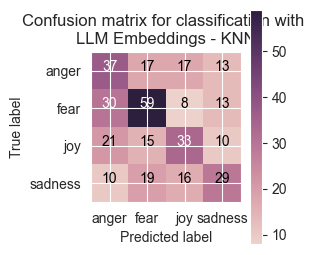

In [98]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [99]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [100]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [101]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [102]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [103]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)  
y_test_llama = label_encode(label_encoder, y_test)

In [104]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [105]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3685 - loss: 1.4917 - val_accuracy: 0.4697 - val_loss: 1.2205
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6298 - loss: 0.9130 - val_accuracy: 0.5447 - val_loss: 1.1086
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7122 - loss: 0.7228 - val_accuracy: 0.5418 - val_loss: 1.1482
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7950 - loss: 0.5680 - val_accuracy: 0.5389 - val_loss: 1.2069
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8473 - loss: 0.4480 - val_accuracy: 0.5562 - val_loss: 1.2372
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8507 - loss: 0.3958 - val_accuracy: 0.5591 - val_loss: 1.3365
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8800 - loss: 0.3399 - val_accuracy: 0.5706 - val_loss: 1.4244
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9113 - loss: 0.2538 - val_accuracy: 0.

In [107]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[9.71332550e-01, 2.84181256e-02, 1.19499746e-04, 1.29968117e-04],
       [9.35488105e-01, 3.10484543e-02, 2.59388220e-02, 7.52459653e-03],
       [2.41470367e-01, 4.69227927e-03, 3.78223490e-06, 7.53833592e-01],
       [4.07949090e-04, 9.15718963e-04, 9.44602787e-01, 5.40734492e-02],
       [8.11948478e-01, 5.20701893e-02, 1.28492177e-01, 7.48921651e-03]],
      dtype=float32)

In [108]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'anger', 'sadness', 'joy', 'anger'], dtype=object)

In [109]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.56


In [111]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.444229,1.268395,0.469741,1.220518
1,1,0.635760,0.896940,0.544669,1.108644
2,2,0.719624,0.709359,0.541787,1.148245
3,3,0.782729,0.584929,0.538905,1.206905
4,4,0.833656,0.461304,0.556196,1.237212
5,5,0.841406,0.421830,0.559078,1.336525
6,6,0.875727,0.348518,0.570605,1.424416
7,7,0.905342,0.273472,0.579251,1.502918
8,8,0.922502,0.225645,0.570605,1.588220
9,9,0.926100,0.216633,0.559078,1.844943


In [112]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.51      0.48      0.49        84
        fear       0.60      0.66      0.63       110
         joy       0.68      0.56      0.61        79
     sadness       0.46      0.50      0.48        74

    accuracy                           0.56       347
   macro avg       0.56      0.55      0.55       347
weighted avg       0.56      0.56      0.56       347



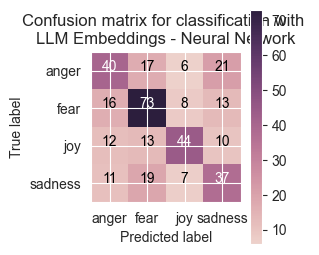

In [113]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

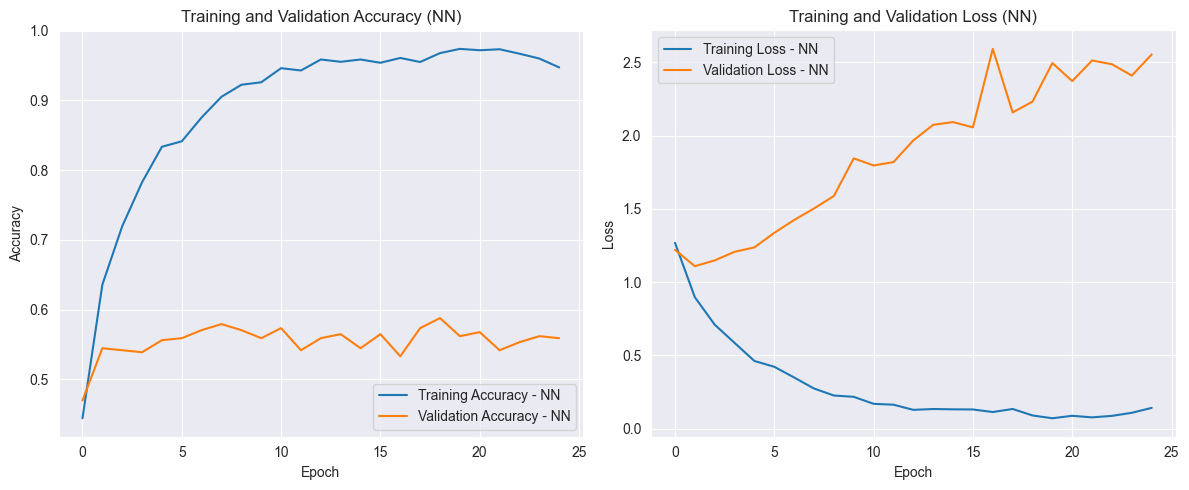

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training log
training_log_2 = pd.read_csv("logs/training_log_2.csv")

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(training_log_2['epoch'], training_log_2['accuracy'], label='Training Accuracy - NN')
plt.plot(training_log_2['epoch'], training_log_2['val_accuracy'], label='Validation Accuracy - NN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (NN)')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(training_log_2['epoch'], training_log_2['loss'], label='Training Loss - NN')
plt.plot(training_log_2['epoch'], training_log_2['val_loss'], label='Validation Loss - NN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (NN)')
plt.legend()

plt.tight_layout()
plt.show()

In [117]:
'''
1. Interpreting Neural Network Plots
    - Training vs. Validation Accuracy: High training accuracy with lower or stagnant validation accuracy indicates overfitting—the model fits the training data well but fails to generalize.
    - Training vs. Validation Loss: Decreasing training loss with increasing validation loss also signals overfitting. Low accuracy for both training and validation suggests underfitting, meaning the model is too simple to learn the data patterns.
    
2. KNN vs. Neural Network
    (1) KNN:
     - Uses a simple distance metric, making it less effective in high-dimensional spaces like LLM embeddings due to the curse of dimensionality.
     - KNN doesn’t learn representations beyond the given embeddings, leading to lower accuracy compared to neural networks.
    (2) Neural Network
     - Learns complex, non-linear patterns from LLM embeddings through multiple layers.
     - If trained properly, it can leverage the semantic richness of embeddings better than KNN. However, it is prone to overfitting without proper regularization.
'''

'\n1. Interpreting Neural Network Plots\n    - Training vs. Validation Accuracy: High training accuracy with lower or stagnant validation accuracy indicates overfitting—the model fits the training data well but fails to generalize.\n    - Training vs. Validation Loss: Decreasing training loss with increasing validation loss also signals overfitting. Low accuracy for both training and validation suggests underfitting, meaning the model is too simple to learn the data patterns.\n    \n2. KNN vs. Neural Network\n    (1) KNN:\n     - Uses a simple distance metric, making it less effective in high-dimensional spaces like LLM embeddings due to the curse of dimensionality.\n     - KNN doesn’t learn representations beyond the given embeddings, leading to lower accuracy compared to neural networks.\n    (2) Neural Network\n     - Learns complex, non-linear patterns from LLM embeddings through multiple layers.\n     - If trained properly, it can leverage the semantic richness of embeddings bette

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [118]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2" 

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Accuracy: 47.50%
              precision    recall  f1-score   support

       anger       0.39      0.65      0.49        20
        fear       0.67      0.20      0.31        20
         joy       0.52      0.75      0.61        20
     sadness       0.50      0.30      0.38        20

    accuracy                           0.47        80
   macro avg       0.52      0.48      0.45        80
weighted avg       0.52      0.47      0.45        80



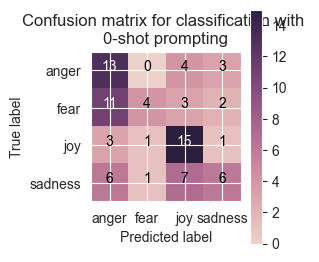

In [119]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @IndigoHawthorne Then u understand that rage is often not pretty, or controlled or rational - it is often visceral-not always logical.
Emotion: anger

Text: Are there any #horror sites that would be interested in my writing a guest article/review? Been really craving a literary outlet lately.
Emotion: fear

Text: Watch this amazing live.ly broadcast by @rosannahill  #musically
Emotion: joy

Text: Im kind of confused.  The one thing i do right now has a great future, but on the other hand so does the new thing . #lost #needhelp
Emotion: sadness


Accuracy: 41.25%
              precision    recall  f1-score   support

      

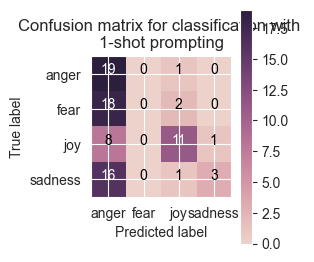

In [120]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @IndigoHawthorne Then u understand that rage is often not pretty, or controlled or rational - it is often visceral-not always logical.
Emotion: anger

Text: Lost Frequencies/Janieck Devy - Reality (Gestort Aber Geil Remix)' is raging at ShoutDRIVE!
Emotion: anger

Text: I think I must scare my coworkers when I'm eating like a rabid animal on my breaks #srry
Emotion: anger

Text: 630am meeting Olympic House #10golds24 .  #neverquit #believe #dreambig #TeamTTO #going4gold
Emotion: anger

Text: @kitanoye Hell is hot and boiling, isi ewu
Emotion: anger

Text: Are there any #horror sites that would be interested in my writing a

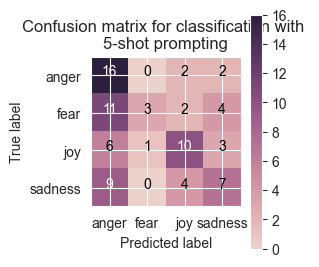

In [121]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [122]:
# Answer here
'''
1. overview of the result
    (1) zero-Shot (Accuracy: 47.50%): The model relies purely on its general pre-trained knowledge about emotions, which allows it to generalize well to the diverse text inputs without being biased by specific examples.
    (2) One-Shot (Accuracy: 41.25%): Providing only one example per emotion likely led to overfitting to that specific example, causing the model to struggle with generalizing to new inputs.
    (3) Five-Shot (Accuracy: 45.00%): The five examples per emotion may have provided the model with more context than one-shot, but they still could have introduced bias and restricted the model's ability to fully generalize.

2. Condition of Overfitting
    (1) overfitting in One-Shot and Five-Shot:
     - In both one-shot and five-shot, the model showed signs of overfitting to the limited examples provided.
     - The specific examples used might not have been representative of all possible variations of emotions in social media text. Consequently, the model may have memorized these few examples instead of generalizing effectively to other types of inputs.
    (2) Zero-Shot Avoided Overfitting: 
     - Without any specific examples, zero-shot prompting did not suffer from overfitting and was able to make use of the LLM’s broad, generalized knowledge.(Lt is more flexible.)
'''

"\n1. overview of the result\n    (1) zero-Shot (Accuracy: 47.50%): The model relies purely on its general pre-trained knowledge about emotions, which allows it to generalize well to the diverse text inputs without being biased by specific examples.\n    (2) One-Shot (Accuracy: 41.25%): Providing only one example per emotion likely led to overfitting to that specific example, causing the model to struggle with generalizing to new inputs.\n    (3) Five-Shot (Accuracy: 45.00%): The five examples per emotion may have provided the model with more context than one-shot, but they still could have introduced bias and restricted the model's ability to fully generalize.\n\n2. Condition of Overfitting\n    (1) overfitting in One-Shot and Five-Shot:\n     - In both one-shot and five-shot, the model showed signs of overfitting to the limited examples provided.\n     - The specific examples used might not have been representative of all possible variations of emotions in social media text. Conseque

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)